In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import squidpy as sq
import random
random.seed(10)
print(random.random()) 

/home/julia/miniconda3/envs/squidpy_env/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/julia/miniconda3/envs/squidpy_env/lib/python3.10/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


0.5714025946899135


/home/julia/miniconda3/envs/squidpy_env/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


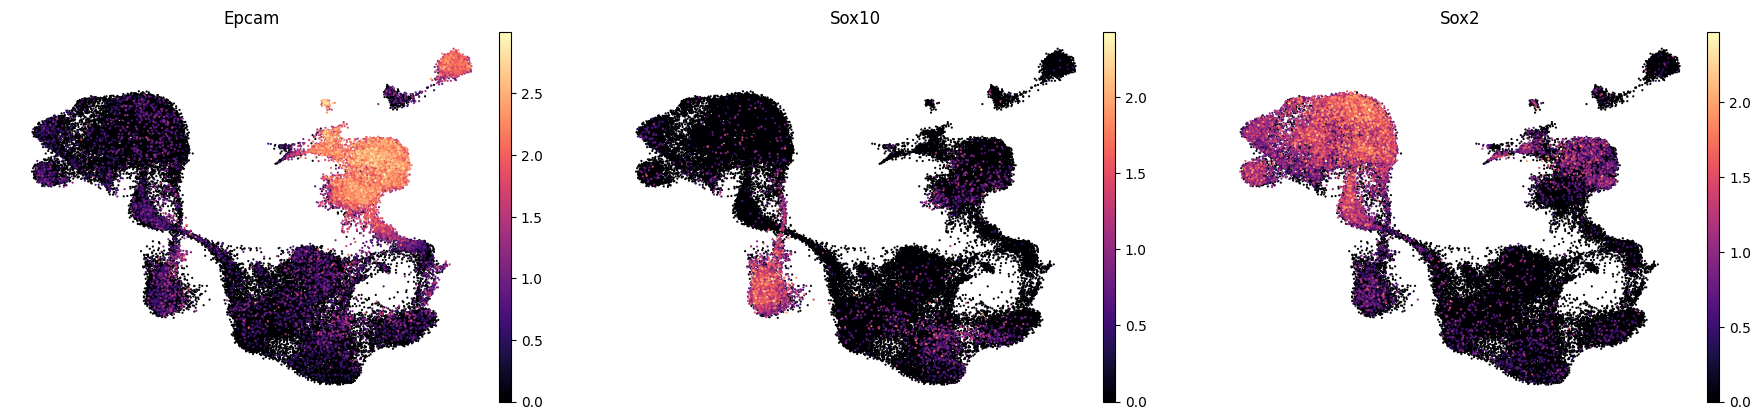

In [2]:
adata=sc.read_h5ad('/home/julia/Xenioum/h5ad/Slice_3__8_5__umap_cluster_annotations.h5ad')
adata
sc.pl.umap(adata, color=[ 'Epcam', 'Sox10', 'Sox2'],  size=10, frameon=False,  color_map='magma', legend_loc='on data')

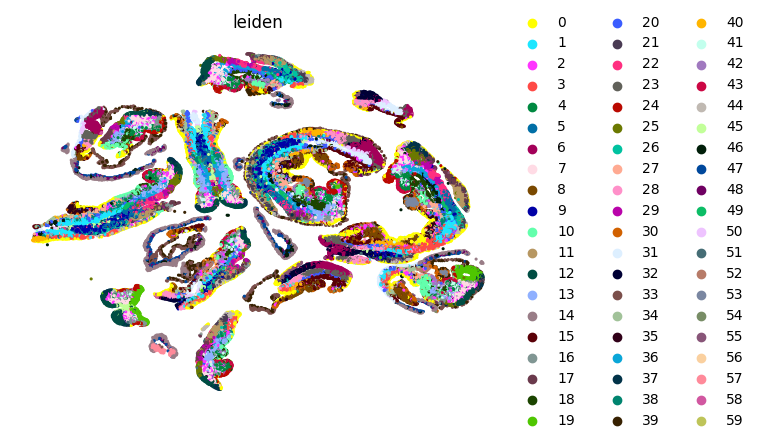

In [3]:
sc.pl.embedding(adata, basis="X_spatial", color=['leiden'], frameon=False, s=20)

In [4]:
adata.obs.head(3)

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,...,log1p_n_genes_by_counts,log1p_total_counts,pct_counts_in_top_10_genes,pct_counts_in_top_20_genes,pct_counts_in_top_30_genes,pct_counts_in_top_40_genes,leiden,highlight,cluster_annotation,Sclice
0,8_5_region3_aaaajaaf-1,1411.426758,999.439941,62,0,0,0,0,62.0,85.932347,...,3.610918,4.143135,45.161290,74.193548,90.322581,100.000000,44,Other,Neural crest trunk and hindbrain true,Slice_3
1,8_5_region3_aaadcoia-1,1396.442261,1006.323792,180,0,0,0,0,180.0,85.932347,...,4.262680,5.198497,37.222222,61.111111,74.444444,83.333333,37,Other,"CNS dorsal midbrain and a bit hindbrain, premi...",Slice_3
2,8_5_region3_aaadejkp-1,1415.331543,1007.018555,78,0,0,0,0,78.0,46.736720,...,3.761200,4.369448,52.564103,71.794872,84.615385,97.435897,17,Other,CNS dorsal neural tube true (forebrain neural ...,Slice_3


In [5]:
adata1=adata.copy()

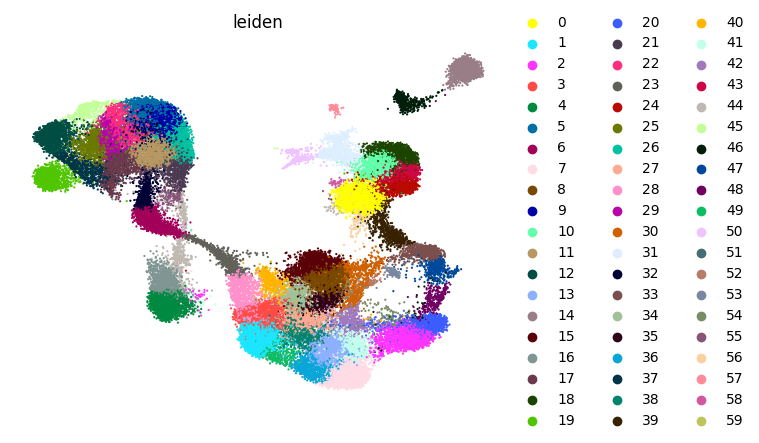

In [6]:
sc.pl.umap(adata, color=['leiden'],  size=10, frameon=False,  color_map='magma')

In [7]:
adata.obs=adata.obs.drop('cluster_annotation', axis=1)
adata.obs.columns

Index(['cell_id', 'x_centroid', 'y_centroid', 'transcript_counts',
       'control_probe_counts', 'control_codeword_counts',
       'unassigned_codeword_counts', 'deprecated_codeword_counts',
       'total_counts', 'cell_area', 'nucleus_area', 'region',
       'EmbryonicDay_8_5', 'cell_id_duplicate', 'n_genes_by_counts',
       'log1p_n_genes_by_counts', 'log1p_total_counts',
       'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes',
       'pct_counts_in_top_30_genes', 'pct_counts_in_top_40_genes', 'leiden',
       'highlight', 'Sclice'],
      dtype='object')

In [8]:
cluster_df = pd.read_csv('/home/julia/Xenioum/clusters_table/slice3__8_5.csv', sep=';')
cluster_df.head()

,Clusters,name
0,0,Ectoderm surface all body true
1,1,Somites (Fmod) true
2,2,Endothelial true
3,3,Somites broader true
4,4,Neural crest cranial true


In [9]:
new_cluster_names=cluster_df['name'].to_list()
new_cluster_names

['Ectoderm surface all body true',
 'Somites (Fmod) true',
 'Endothelial true',
 'Somites broader true',
 'Neural crest cranial true',
 'CNS Neural tube true (Pax6+)',
 'caudal NMPs part of neural tube and lateral epiblast true',
 'cranial mesenchymal true (Rspo1)',
 'Mesoderm lateral and limb true',
 'CNS Neural tube true (Pax6+, Prdm8)',
 'Placodes posterior branchial arch ectoderm true (Epcam, tbx2)',
 'CNS dorsal neural tube true (Pax6+, Pax3)',
 'CNS brain neural folds midbrain-hindbrain boundary true',
 'Mesenchyme dorsal branchial arches true',
 'Amniotic membrane true (Spink1)',
 'Endoderm of the developing gut tube (Nkx2-3, Pitx1)',
 'Neural crest cranial arches and a bit forebrain derived true (Tfap2b, Sox10)',
 'CNS dorsal neural tube true (forebrain neural fold (Gdf7, Fibcd1)',
 'Foregut true (Nkx2-3, Epcam, Pax9)',
 'CNS forebrain neural fold true (Nr2e1, Calb2)',
 'Endotheial developing blood vessels true (Pecam, Emnc, Adgrl4)',
 'Neural crest premigratory and most dorsal

In [10]:
from collections import defaultdict
# Dictionary to count occurrences
name_counter = defaultdict(int)

# Result list with modified names
unique_cluster_names = []

for name in new_cluster_names:
    name_counter[name] += 1
    if name_counter[name] == 1:
        unique_cluster_names.append(name)
    else:
        unique_cluster_names.append(f"{name}_{name_counter[name]}")

# Output the new list
print(unique_cluster_names)

['Ectoderm surface all body true', 'Somites (Fmod) true', 'Endothelial true', 'Somites broader true', 'Neural crest cranial true', 'CNS Neural tube true (Pax6+)', 'caudal NMPs part of neural tube and lateral epiblast true', 'cranial mesenchymal true (Rspo1)', 'Mesoderm lateral and limb true', 'CNS Neural tube true (Pax6+, Prdm8)', 'Placodes posterior branchial arch ectoderm true (Epcam, tbx2)', 'CNS dorsal neural tube true (Pax6+, Pax3)', 'CNS brain neural folds midbrain-hindbrain boundary true', 'Mesenchyme dorsal branchial arches true', 'Amniotic membrane true (Spink1)', 'Endoderm of the developing gut tube (Nkx2-3, Pitx1)', 'Neural crest cranial arches and a bit forebrain derived true (Tfap2b, Sox10)', 'CNS dorsal neural tube true (forebrain neural fold (Gdf7, Fibcd1)', 'Foregut true (Nkx2-3, Epcam, Pax9)', 'CNS forebrain neural fold true (Nr2e1, Calb2)', 'Endotheial developing blood vessels true (Pecam, Emnc, Adgrl4)', 'Neural crest premigratory and most dorsal neural tube true', '

In [11]:
adata1.rename_categories("leiden", unique_cluster_names)

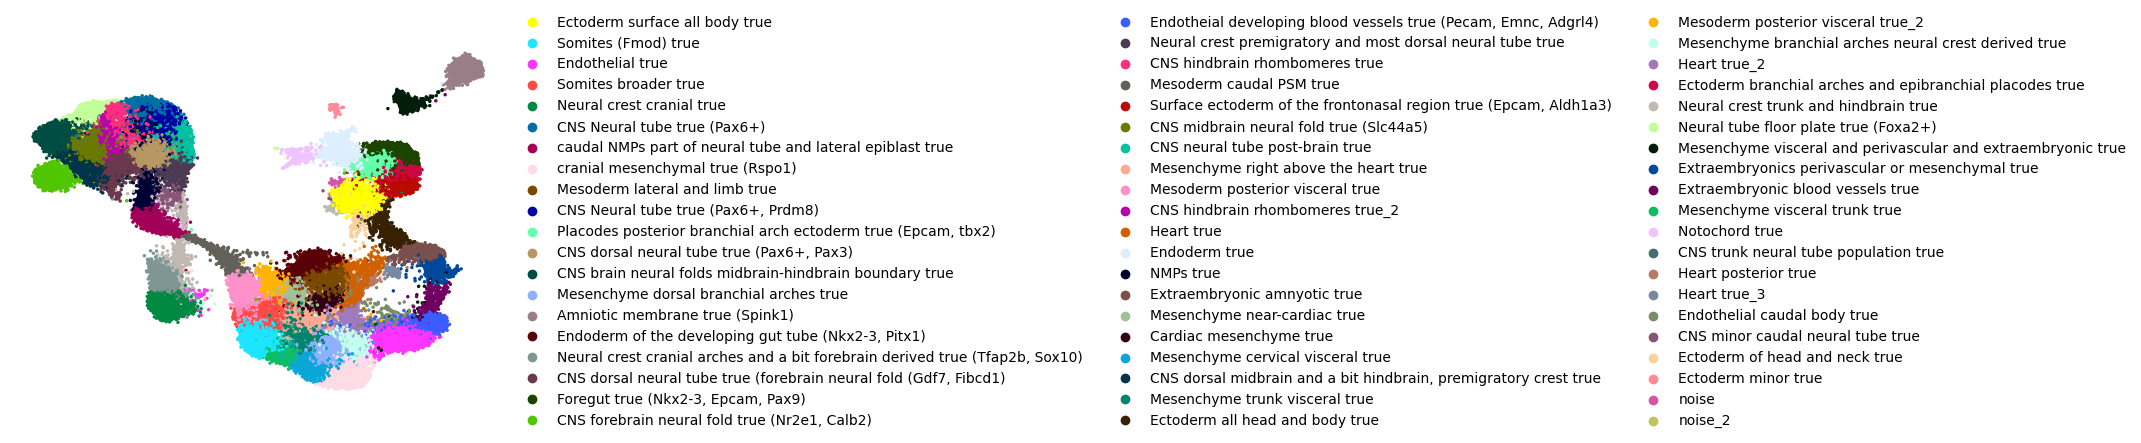

In [12]:
sc.pl.umap(adata1, color="leiden", title="", frameon=False, size=25, 
          # save="full_annotat_8_5_3.svg"
          )

In [13]:
adata1_ep = adata[adata.obs['leiden'].isin(['39','56','0','24','43','10','18','58','31','50'])]
print(adata1_ep.shape)
adata1_ep.obs['leiden'].value_counts()


(8238, 347)


leiden
0     2069
10    1448
18    1109
24     945
31     854
39     733
43     613
50     264
56     162
58      41
Name: count, dtype: int64

In [14]:
adata1_ep.raw = adata1_ep
sc.pp.normalize_total(adata1_ep, inplace=True) # Normalize counts per cell
sc.pp.log1p(adata1_ep) # Logarithmize
sc.pp.pca(adata1_ep, n_comps=90) # do principal component analysis
sc.pp.neighbors(adata1_ep, n_neighbors=45, n_pcs=80) # compute a neighborhood graph
sc.tl.umap(adata1_ep) # embed the neighborhood graph of the data

In [15]:
sc.tl.leiden(adata1_ep, resolution=2.5) # cluster the cells into subgroups

/tmp/ipykernel_222512/3713323053.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata1_ep, resolution=2.5) # cluster the cells into subgroups


In [16]:
adata1_ep.obs.head()

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,...,n_genes_by_counts,log1p_n_genes_by_counts,log1p_total_counts,pct_counts_in_top_10_genes,pct_counts_in_top_20_genes,pct_counts_in_top_30_genes,pct_counts_in_top_40_genes,leiden,highlight,Sclice
7,8_5_region3_aaahajki-1,1437.855225,999.980957,59,0,0,0,0,59.0,122.373442,...,31,3.465736,4.094345,62.711864,81.355932,98.305085,100.000000,6,Other,Slice_3
277,8_5_region3_abdkbmja-1,1412.991333,1418.367676,72,0,0,0,0,72.0,47.097970,...,37,3.637586,4.290460,55.555556,76.388889,90.277778,100.000000,1,Other,Slice_3
278,8_5_region3_abdlihmb-1,1422.431763,1423.747437,52,0,0,0,0,52.0,85.435628,...,32,3.496508,3.970292,51.923077,76.923077,96.153846,100.000000,1,Other,Slice_3
279,8_5_region3_abdmiikp-1,1414.789185,1426.828247,37,0,0,0,0,37.0,75.817347,...,26,3.295837,3.637586,56.756757,83.783784,100.000000,100.000000,1,Other,Slice_3
280,8_5_region3_abdniphi-1,1419.562256,1414.147095,107,0,0,0,0,107.0,73.107971,...,46,3.850148,4.682131,44.859813,70.093458,85.046729,94.392523,1,Other,Slice_3


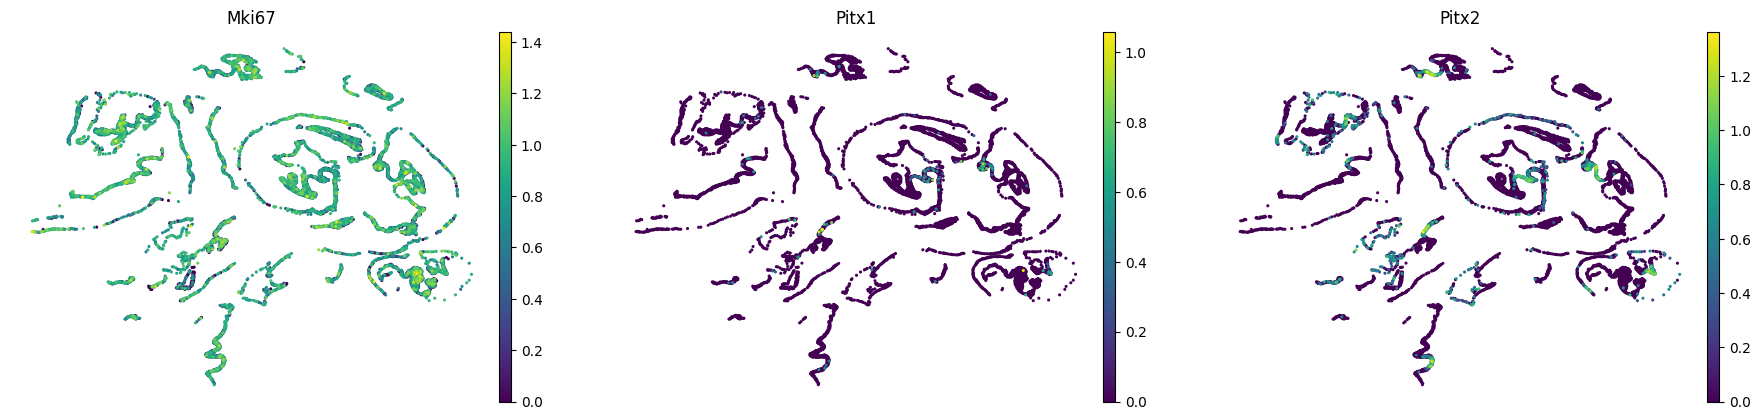

In [17]:
adata1_ep.obsm["X_spatial"] = adata1_ep.obsm["spatial"].copy()
sc.pl.embedding(adata1_ep, basis="X_spatial", color=['Mki67', 'Pitx1', 'Pitx2'], frameon=False, s=20)

In [18]:
adata=adata1_ep.copy()

# Perform the rank_genes_groups analysis
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')  # or 'wilcoxon', 'logreg'

# Plot the top ranked genes
#sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)  # Adjust n_genes as needed

# Extract the result from adata
result = adata.uns['rank_genes_groups']

# Get the groups
groups = result["names"].dtype.names

# Create a DataFrame from the result
all1 = pd.DataFrame(
    {
        group + "_" + key[:1]: result[key][group]
        for group in groups
        for key in ["names", "logfoldchanges"]
    }
)

# Show the head of the DataFrame
all1.head(3)

,0_n,0_l,1_n,1_l,2_n,2_l,3_n,3_l,4_n,4_l,...,14_n,14_l,15_n,15_l,16_n,16_l,17_n,17_l,18_n,18_l
0,Eya1,1.177371,Pax6,5.498062,Pax9,4.430471,Pdgfa,1.342568,Hapln1,1.385811,...,Slit2,2.884853,Spink1,5.048391,Igfbp4,1.405589,Pax9,3.555573,Gadd45a,2.666624
1,Fgf8,2.471417,Aldh1a3,6.043778,Nr2f2,1.080932,Hapln1,1.479496,Car4,0.960782,...,Shh,5.723786,Car4,1.533656,Sox17,4.831684,Pax2,1.997328,Epha4,1.479769
2,Epcam,0.315661,Dlx5,2.068717,Eya1,0.904643,Cxcl12,2.014261,Id2,1.044985,...,T,5.403631,Cdh6,4.408587,T,3.887275,Fhod3,2.345634,Bmper,3.403759


In [19]:
adata1_ep

AnnData object with n_obs × n_vars = 8238 × 347
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'EmbryonicDay_8_5', 'cell_id_duplicate', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_30_genes', 'pct_counts_in_top_40_genes', 'leiden', 'highlight', 'Sclice'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'cluster_annotation_colors', 'highlight_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_spatial', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [21]:
cluster_df = pd.read_csv('/home/julia/Xenioum/8_5__EPCAM_clusters/Slice3_EPCAM__8_5.csv', sep=';')
cluster_df.head(3)

,clusters,name
0,0,epibranchial ectoderm
1,1,olfactory
2,2,foregut


In [22]:
# Check the data types of 'leiden' and 'Clusters'
print(adata1_ep.obs['leiden'].dtype)
print(cluster_df['clusters'].dtype)

category
int64


In [23]:
# Convert both 'leiden' and 'Clusters' columns to string
adata1_ep.obs['leiden'] = adata1_ep.obs['leiden'].astype(str)
cluster_df['clusters'] = cluster_df['clusters'].astype(str)

In [24]:
# Merge the cluster names from cluster_df into adata.obs based on the 'leiden' column
adata1_ep.obs = adata1_ep.obs.merge(cluster_df, how='left', left_on='leiden', right_on='clusters')

# Check the first few rows to ensure the merge was successful
print(adata1_ep.obs[['leiden', 'name']].head())

  leiden          name
0      6  neural crest
1      1     olfactory
2      1     olfactory
3      1     olfactory
4      1     olfactory


In [25]:
adata1_ep.obs.head(3)

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,...,log1p_total_counts,pct_counts_in_top_10_genes,pct_counts_in_top_20_genes,pct_counts_in_top_30_genes,pct_counts_in_top_40_genes,leiden,highlight,Sclice,clusters,name
0,8_5_region3_aaahajki-1,1437.855225,999.980957,59,0,0,0,0,59.0,122.373442,...,4.094345,62.711864,81.355932,98.305085,100.0,6,Other,Slice_3,6,neural crest
1,8_5_region3_abdkbmja-1,1412.991333,1418.367676,72,0,0,0,0,72.0,47.097970,...,4.290460,55.555556,76.388889,90.277778,100.0,1,Other,Slice_3,1,olfactory
2,8_5_region3_abdlihmb-1,1422.431763,1423.747437,52,0,0,0,0,52.0,85.435628,...,3.970292,51.923077,76.923077,96.153846,100.0,1,Other,Slice_3,1,olfactory


In [26]:
# Drop unnecessary 'Clusters' column and rename 'name' to 'cluster_annotation'
adata1_ep.obs.drop(['clusters'], axis=1, inplace=True)  # Drop redundant 'Clusters' column
adata1_ep.obs.rename(columns={'name': 'cluster_annotation_EPCAM'}, inplace=True)  # Rename 'name' to 'cluster_annotation'

# Verify the result
print(adata1_ep.obs[['leiden', 'cluster_annotation_EPCAM']].head())

  leiden cluster_annotation_EPCAM
0      6             neural crest
1      1                olfactory
2      1                olfactory
3      1                olfactory
4      1                olfactory


In [27]:
print(adata1_ep.obs[['cell_id','x_centroid','y_centroid', 'leiden', 'cluster_annotation_EPCAM']].head())

                  cell_id   x_centroid   y_centroid leiden  \
0  8_5_region3_aaahajki-1  1437.855225   999.980957      6   
1  8_5_region3_abdkbmja-1  1412.991333  1418.367676      1   
2  8_5_region3_abdlihmb-1  1422.431763  1423.747437      1   
3  8_5_region3_abdmiikp-1  1414.789185  1426.828247      1   
4  8_5_region3_abdniphi-1  1419.562256  1414.147095      1   

  cluster_annotation_EPCAM  
0             neural crest  
1                olfactory  
2                olfactory  
3                olfactory  
4                olfactory  


In [28]:
adata1_ep_annotation=adata1_ep.obs[['cell_id','x_centroid','y_centroid', 'leiden', 'cluster_annotation_EPCAM']]
adata1_ep_annotation.head(3)

,cell_id,x_centroid,y_centroid,leiden,cluster_annotation_EPCAM
0,8_5_region3_aaahajki-1,1437.855225,999.980957,6,neural crest
1,8_5_region3_abdkbmja-1,1412.991333,1418.367676,1,olfactory
2,8_5_region3_abdlihmb-1,1422.431763,1423.747437,1,olfactory


In [29]:
adata1_ep.obs

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,...,log1p_n_genes_by_counts,log1p_total_counts,pct_counts_in_top_10_genes,pct_counts_in_top_20_genes,pct_counts_in_top_30_genes,pct_counts_in_top_40_genes,leiden,highlight,Sclice,cluster_annotation_EPCAM
0,8_5_region3_aaahajki-1,1437.855225,999.980957,59,0,0,0,0,59.0,122.373442,...,3.465736,4.094345,62.711864,81.355932,98.305085,100.000000,6,Other,Slice_3,neural crest
1,8_5_region3_abdkbmja-1,1412.991333,1418.367676,72,0,0,0,0,72.0,47.097970,...,3.637586,4.290460,55.555556,76.388889,90.277778,100.000000,1,Other,Slice_3,olfactory
2,8_5_region3_abdlihmb-1,1422.431763,1423.747437,52,0,0,0,0,52.0,85.435628,...,3.496508,3.970292,51.923077,76.923077,96.153846,100.000000,1,Other,Slice_3,olfactory
3,8_5_region3_abdmiikp-1,1414.789185,1426.828247,37,0,0,0,0,37.0,75.817347,...,3.295837,3.637586,56.756757,83.783784,100.000000,100.000000,1,Other,Slice_3,olfactory
4,8_5_region3_abdniphi-1,1419.562256,1414.147095,107,0,0,0,0,107.0,73.107971,...,3.850148,4.682131,44.859813,70.093458,85.046729,94.392523,1,Other,Slice_3,olfactory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,8_5_region3_oinhkfdb-1,3084.153564,2579.701172,119,0,0,0,0,119.0,84.351878,...,3.970292,4.787492,45.378151,67.226891,81.512605,89.915966,5,Other,Slice_3,epithelium ventral
8234,8_5_region3_oinkfala-1,3077.545410,2593.743408,83,0,0,0,0,83.0,56.806565,...,3.688879,4.430817,50.602410,75.903614,89.156627,100.000000,5,Other,Slice_3,epithelium ventral
8235,8_5_region3_oinldhkd-1,3084.365723,2588.861328,191,0,0,0,0,191.0,119.438286,...,4.248495,5.257495,43.455497,67.539267,79.057592,84.816754,5,Other,Slice_3,epithelium ventral
8236,8_5_region3_oinmflpc-1,3073.286865,2584.405029,64,0,0,0,0,64.0,122.463754,...,3.526361,4.174387,56.250000,79.687500,95.312500,100.000000,5,Other,Slice_3,epithelium ventral


In [30]:
adata1_ep_annotation.to_csv('/home/julia/Xenioum/EPCAM_8_5__annotation_Johan/Slice3_EPCAM_annotation.csv', index=False)

In [31]:
adata1_ep.write_h5ad('/home/julia/Xenioum/h5ad/adata3_8-5_ep_clusters_annotation.h5ad')

In [32]:
adata1_ep=sc.read_h5ad('/home/julia/Xenioum/h5ad/adata3_8-5_ep_clusters_annotation.h5ad')


/home/julia/miniconda3/envs/squidpy_env/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


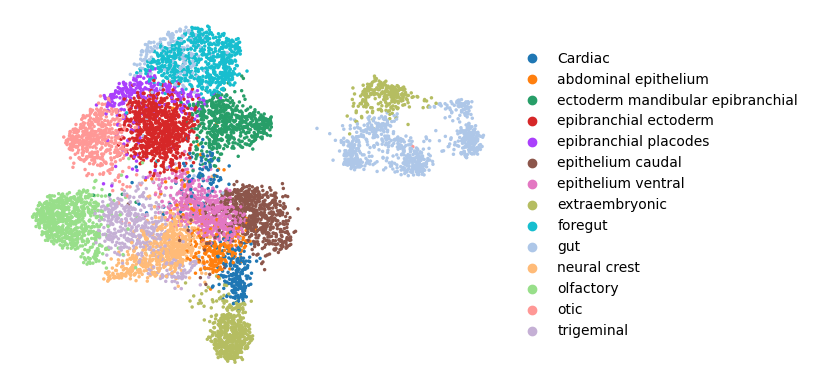

In [33]:
sc.pl.umap(adata1_ep, color="cluster_annotation_EPCAM", title="", frameon=False, size=25, 
          # save="full_annotat_8_5_3.svg"
          )